<a href="https://colab.research.google.com/github/aaoiii/2023-2-ESAA/blob/main/9%EC%A3%BC%EC%B0%A8_%ED%8C%8C%EB%A8%B8%EC%99%84_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap05. 회귀**
#회귀 소개
- 데이터 값이 평균과 같은 일정한 값으로돌아가려는 경향을 이용한 통계학 기법
- 여러 개의 독립 변수와 한개의 종속변수 간의 상관관계를 모델링하는 기법
- 주어진 피처와 결정 값 데이터 기반에서 학습을 토해 최적의 회귀 계수를 찾아내는 것


- 회귀계수
  - 선형/비선형

- 독립변수 개수
  - 단일 회귀/다중회귀


- 지도학습
  - 분류 : 예측값이 카테고리와 같은 이산형 클래스 값
  - 회귀 : 연속형 숫자 값

- 선형 회귀 모델
  - 실제 값과 예측값의 차이를 최소화하는 직선형 회귀선을 최적화하는 방식
  - 일반 선형 회귀, 릿지, 라쏘, 엘라스틱넷, 로지스틱 회귀

# 2. 단순 선형 회귀를 통한 회귀 이해
- 단순 선형회귀는 독립변수 하나, 종속변수 하나
- 잔차 : 실제 값과 회귀 모델의 차이에 따른 오류값
- 오류값 합이 최소가 될 수 있는 최적의 회귀계수를 찾는 의미
- MSE , RSS
- RSS는 비용함수

# 3. 비용 최소화하기- 경사하강법 소개
- 경사하강법 : 점진적으로 반복적인 계싼을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
  - 데이터를 기반으로 알고리즘이 스스로 학습한다는 머신러닝의 개념을 가능하게 함
  - 예측값과 실제 값의 차이가 작이지는 방향성을 가지고 W 파라미터를 지속해서 보정함
  - 비용함수가 이차함수면 각각 파라미터에 대해 편미분해서 나온 결괏값을 반복적으로 보정하여 파라미터를 업데이트 함
  - 편미분 값이 너무 클 수 있기 때문에 보정계수인 **학습률**을 곱함

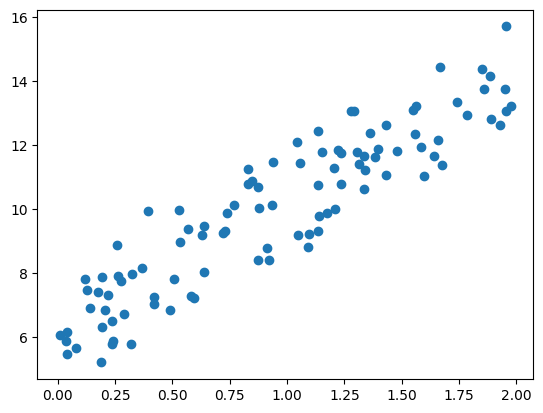

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
#y=4x+6 을 근사 (w1=4,w0=6). 임의의 값은 노이즈를 위해 만듦.
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

#X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [ ]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [ ]:
#w1 과 w0을 업데이트 할 w1_update,w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  #먼저 w1_update,w0_update를 각각 w1,w0의 shape와 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  #w1과 w0을 업데이트할 w1_update와 w0_update계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [ ]:
#get_weight_updates를 경사하강방식으로 반복적으로 수행하여 파라미터 업데이트하는 함수

#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X,y,iters=10000):
  #w0와 w1을 모두 0으로 초기화.
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  #인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1,w0 업데이트 수행.
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,Xy,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [ ]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1, w0=gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total cost:{0:.4f}'.format(get_cost(y,y_pred)))

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

- 경사하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트함
=> 확률적 경사 하강법: 일부 데이터만 이용해 w가 업데이트되는 값을 계산함
- 미니배치 확률적 경사하강법

In [ ]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  prev_cost=1000000
  iter_index=0

  for ind in range(iters):
    np.random.seed(ind)
    #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X,sample_y로 저장
    stochastic_random_index=np.random.premutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update,w0_update 계산 후 업데이터
    w1_update,w0_date=get_weight_updates(w1,w0,sample_X,sample_y,leanring_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [ ]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

# 4. 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측
**Linear Regression 클래스 - Ordinary Least Squares**

In [ ]:
#class sklearn.linear_model.LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)

#fit_intercept: 절편값을 계산할 것인지 말지를 지정
#normalize
#coef_
#intercept_

- 다중공선성 문제 : 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 민감해짐

**회귀 평가 지표**
- MAE
- MSE
- RMSE
- R^2

<함수에 회귀 평가 지표를 적용할 때 주의점>
- MAE 의 scoring 파라미터 neg_mean_absolute_error 에서는 MAE가 음수가 될 수 없음
=> 보정 필요
  - -1을 원래 평가 지표 값에 곱해서 음수를 만든다.

**LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터 세트 로드
boston=load_boston()

#boston 데이터 세트 dataframe 변환
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

In [6]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

#boston 데이터 세트 dataframe 변환
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)

#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE']=boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
bostonDF.info()
# CHAS와 RAD가 category로 되어있이므로 float 형으로 변환하기
bostonDF['CHAS']=bostonDF['CHAS'].astype(np.float64)
bostonDF['RAD']=bostonDF['RAD'].astype(np.float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


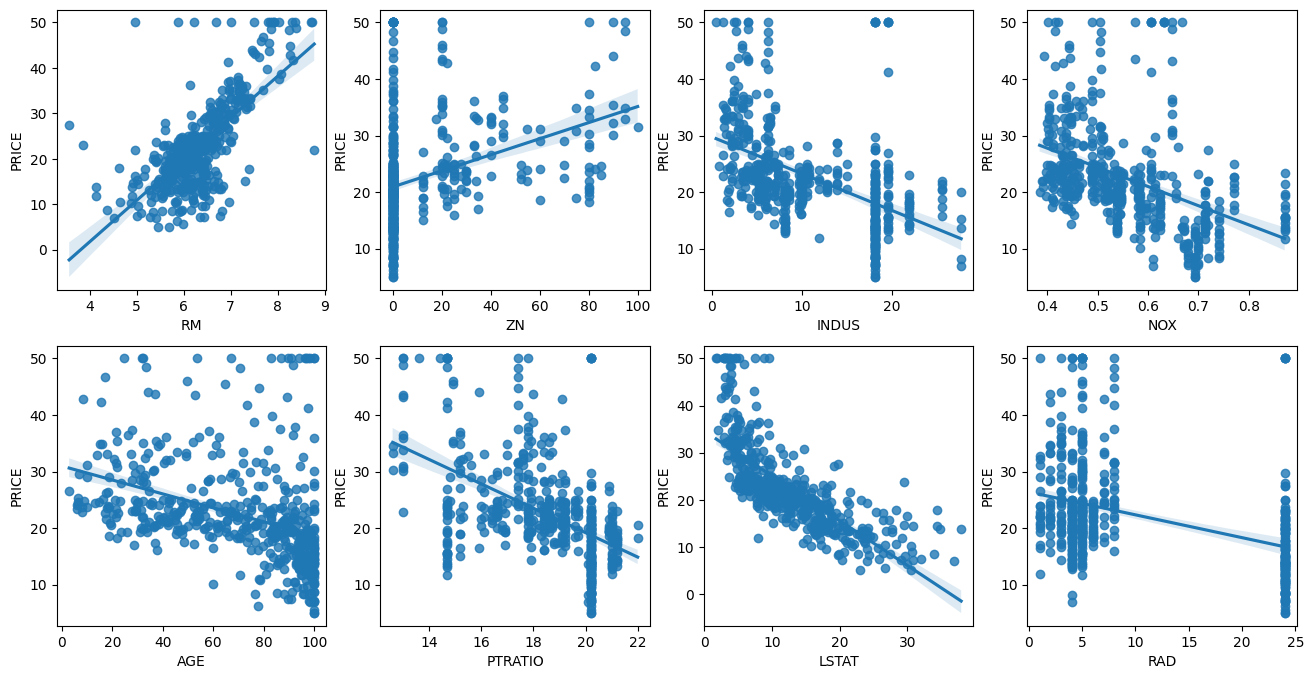

In [13]:
#seaborn 의 regplot 은 산점도 + 회귀직선
#2개의 행과 4개의 열을 가진 subplots를 이용, axs는 4x2개의 ax를 가짐
fig, axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  #시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)

#선형 회귀 OLS로 학습/예측 평가 수행
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f},RMSE:{1:.3F}'.format(mse,rmse))
print('Variance score:{0:.3f}'.format(r2_score(y_test,y_preds)))




MSE:17.297,RMSE:4.159
Variance score:0.757


In [15]:
#절편과 회귀계수
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [16]:
#회귀 걔쑤를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
#교차검증으로 MSE RMSE 측정
from sklearn.model_selection import cross_val_score

X_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error)로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

# 5. 다항 회귀와 과(대)적합/과소적합 이해
**다항 회귀 이해**

- 다항 회귀는 **선형 회귀**이다!
  - 선형/비선형을 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이고, 독립 변수의 선형/비션형 여부와는 무관하다.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2x2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

#degree=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [21]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [22]:
#3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

#Linear Regression 에 3차다항식 계수 feature와 3차다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 shape:',model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape: (10,)


In [23]:
#사이킷런의 PipeLine 객체를 이용해 한번에 다항회귀를 구현
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3+X[:,0]**2+4*X[:,1]**3
  return y

#Pipeline 객체로 Streamline 하게 Polynomial Feature 변환과 LinearRegression을 연결
model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)

print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀 계수
 [0.   0.17 0.17 0.34 0.5  0.67 0.67 1.01 1.51 2.19]


# 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어져 테스트 환경에서는 예측 정확도가 떨어지는 과적합 문제가 발생한다.

- 피처 x, 타겟 y가 잡음이 포함된 다항식의 코사인 그래프 관계를 가진다

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

#임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5*np.pi*X)

#X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터이다.
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

#y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y=true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


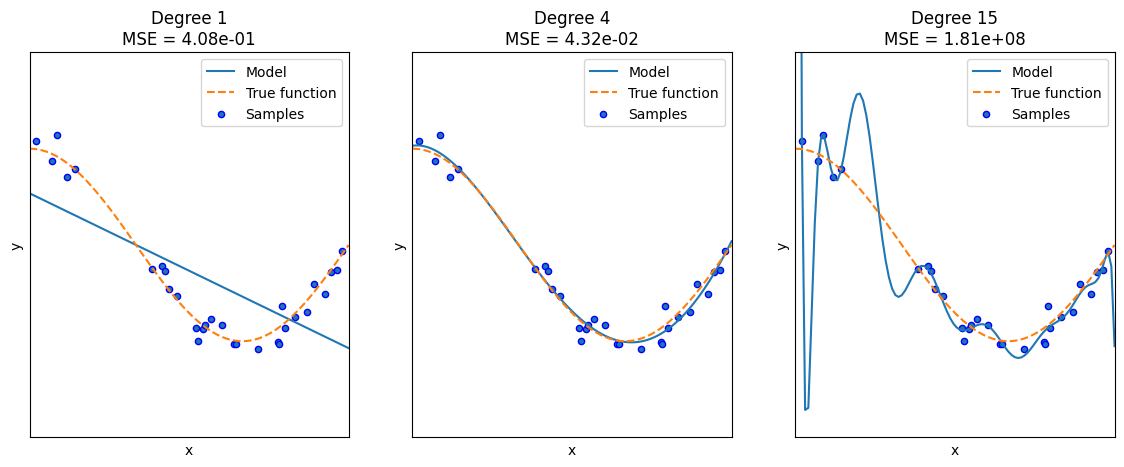

In [27]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

#다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교한다.
for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())

  #개별 degree별로 Polynomial 변환한다.
  polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  #교차검증으로 다항 회귀를 평가한다.
  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  #Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀 계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행한다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x'); plt.ylabel('y')
  plt.xlim((0,1)); plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선으로 표현된 예측 곡선: 다항 회귀 예측 곡선
- 점선으로 표현된 곡선 : 실제 데이터 세트 X,Y 의 코사인 곡선

**편향-분산 트레이드 오프**

- degree1일때의 그래프가 고편향성을 가짐
  - 지나치게 한 방향성으로 치우침
- degree15일때의 그래프가 고분산성을 가짐
  - 하나하나 특성을 반영하여 매우 복잡하고 지나치게 높은 변동성을 가짐


- 편향과 분산은 한쪽이 높으면 한쪽이 낮아짐
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점을 통과하며 분산을 높이면 예측성능 저하됨
